## **Model DenseNet 121 (Pre-trained Model)**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import Model

DN121 = DenseNet121(include_top = False, 
                    weights = 'imagenet', 
                    input_shape = (64,64,3))

29097984/29084464 [==============================] - 1s 0us/step


In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer121 = DN121.get_layer('relu')

# Freeze the DenseNet layers
# Set DN121.trainable to False moves all the layer's weights from trainable to non-trainable
DN121.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer121.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)
model121 = Model(DN121.input, pred) 

# Tried 0.1, 0.2 and 0.3 for dropout, similar
# Tried 256, 128, 64

In [ ]:
DN121.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.67963 to fit



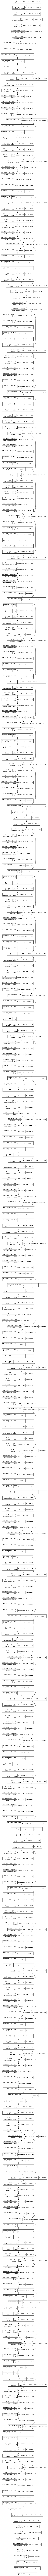

In [ ]:
plot_model(model121, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
adam = optimizers.Adam(learning_rate= 1e-3)
model121.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and run the model 
hist = model121.fit(
            train_images, 
            train_labels,
            epochs= 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split=0.1,
            verbose=1)


Epoch 1/10
702/702 [==============================] - 30s 32ms/step - loss: 0.1679 - accuracy: 0.9370 - val_loss: 0.1193 - val_accuracy: 0.9527
Epoch 2/10
702/702 [==============================] - 17s 24ms/step - loss: 0.1242 - accuracy: 0.9522 - val_loss: 0.1152 - val_accuracy: 0.9611
Epoch 3/10
702/702 [==============================] - 20s 28ms/step - loss: 0.1083 - accuracy: 0.9587 - val_loss: 0.0589 - val_accuracy: 0.9804
Epoch 4/10
702/702 [==============================] - 17s 24ms/step - loss: 0.0991 - accuracy: 0.9636 - val_loss: 0.0765 - val_accuracy: 0.9748
Epoch 5/10
702/702 [==============================] - 18s 26ms/step - loss: 0.0902 - accuracy: 0.9658 - val_loss: 0.0773 - val_accuracy: 0.9732
Epoch 6/10
702/702 [==============================] - 16s 23ms/step - loss: 0.0826 - accuracy: 0.9688 - val_loss: 0.0703 - val_accuracy: 0.9812
Epoch 7/10
702/702 [==============================] - 16s 23ms/step - loss: 0.0739 - accuracy: 0.9729 - val_loss: 0.0631 - val_accuracy:

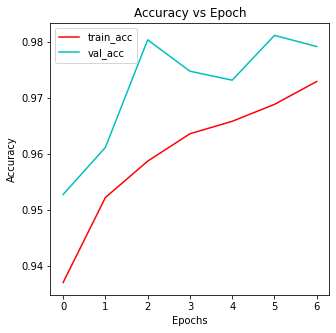

In [ ]:
# plot the accuracies
L = len(hist.history["accuracy"])
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, L), 
  hist.history["accuracy"], 
  label="train_acc",
  color='r')
plt.plot(np.arange(0, L), 
  hist.history["val_accuracy"], 
  label="val_acc",
  color='c')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best");

In [ ]:
accuracy = model121.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 2s 21ms/step - loss: 0.1097 - accuracy: 0.9573

 Test_Accuracy:- 0.9573076963424683


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1300
           1       0.96      0.95      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



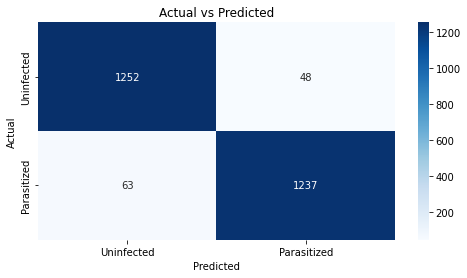

In [ ]:
pred = model121.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_tru = np.argmax(test_labels, axis = 1)

# Print the classification report
# Plot the heatmap using confusion matrix
print(classification_report(y_tru, pred))
cmat = confusion_matrix(y_tru, pred)
plt.figure(figsize=(8,4))
sns.heatmap(cmat, 
            annot = True, 
            fmt='.0f', 
            cmap="Blues",
            xticklabels=['Uninfected', 'Parasitized'], 
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model DenseNet 121 + Data Augmentation (Pre-trained model)**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import Model

DN121_Aug = DenseNet121(include_top = False, 
                    weights = 'imagenet', 
                    input_shape = (64,64,3))

In [ ]:
# Clear backend
# Fix the seed for random number generators
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer121_Aug = DN121_Aug.get_layer('relu')

# Freeze the DenseNet layers
# Set DN121_Aug.trainable to False moves all the layer's weights from trainable to non-trainable
DN121_Aug.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer121_Aug.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)
model121_Aug = Model(DN121_Aug.input, pred) 

# We've tried 0.1, 0.2 and 0.3 for dropout, similar
# We've tried 256, 128, 64

In [ ]:
DN121_Aug.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 70, 70, 3)   0           ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']   

In [ ]:
plot_model(model121_Aug, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
adam = optimizers.Adam(learning_rate= 1e-3)
model121_Aug.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and runn the model for 10 epochs
hist   = model121_Aug.fit(train_generator, 
                      validation_data = val_generator,
                      epochs= 10,
                      callbacks = callbacks,
                      batch_size = 32,            
                      verbose=1)

# Change batch_size 16, 32 and 64. 64 got the best result, but very tiny improvement

Epoch 1/10
390/390 [==============================] - 44s 92ms/step - loss: 0.2377 - accuracy: 0.9066 - val_loss: 0.1484 - val_accuracy: 0.9385
Epoch 2/10
390/390 [==============================] - 33s 84ms/step - loss: 0.2067 - accuracy: 0.9199 - val_loss: 0.1611 - val_accuracy: 0.9327
Epoch 3/10
390/390 [==============================] - 33s 84ms/step - loss: 0.1955 - accuracy: 0.9242 - val_loss: 0.1394 - val_accuracy: 0.9442
Epoch 4/10
390/390 [==============================] - 33s 84ms/step - loss: 0.1936 - accuracy: 0.9261 - val_loss: 0.1214 - val_accuracy: 0.9554
Epoch 5/10
390/390 [==============================] - 32s 83ms/step - loss: 0.1881 - accuracy: 0.9274 - val_loss: 0.1233 - val_accuracy: 0.9573
Epoch 6/10
390/390 [==============================] - 33s 84ms/step - loss: 0.1872 - accuracy: 0.9279 - val_loss: 0.1177 - val_accuracy: 0.9581
Epoch 7/10
390/390 [==============================] - 32s 82ms/step - loss: 0.1853 - accuracy: 0.9282 - val_loss: 0.1125 - val_accuracy:

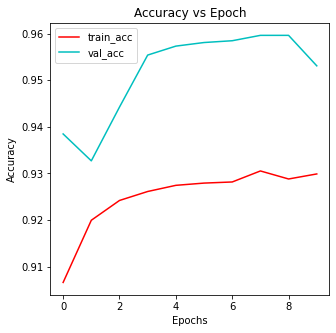

In [ ]:
# plot the accuracies
L = len(hist.history["accuracy"])
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, L), 
  hist.history["accuracy"], 
  label="train_acc",
  color='r')
plt.plot(np.arange(0, L), 
  hist.history["val_accuracy"], 
  label="val_acc",
  color='c')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best");

In [ ]:
accuracy = model121_Aug.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 5s 31ms/step - loss: 0.1187 - accuracy: 0.9531

 Test_Accuracy:- 0.9530768990516663


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1300
           1       0.98      0.92      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



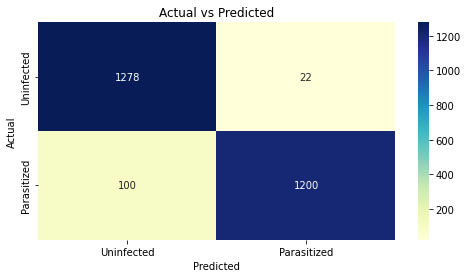

In [ ]:
pred = model121_Aug.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_tru = np.argmax(test_labels, axis = 1)

# Print the classification report
# Plot the heatmap using confusion matrix
print(classification_report(y_tru, pred))
cmat = confusion_matrix(y_tru, pred)
plt.figure(figsize=(8,4))
sns.heatmap(cmat, 
            annot = True, 
            fmt='.0f', 
            cmap="YlGnBu",
            xticklabels=['Uninfected', 'Parasitized'], 
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()